In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
# Filtering out those with and without super strength
smokes = df.loc[df['smoker']== 'yes'].copy()
non = df.loc[df['smoker']== 'no'].copy()

In [10]:
# Creating varibles for feature of interest
df_smoke = smokes['charges']
df_nope = non['charges']

## HYPOTH and select test

## Test assump

In [11]:
# check outliers for the smoke
zscores_smokes= stats.zscore(df_smoke)
outliers = abs(zscores_smokes)>3
np.sum(outliers)

0

In [12]:
# check outliers for the nope
zscores_nope= stats.zscore(df_nope)
nope_outliers = abs(zscores_nope)>3
np.sum(nope_outliers)

24

In [14]:
# remove outliers from nope group
df_nope = df_nope[(np.abs(stats.zscore(df_nope)) < 3)]

## Check for normality

In [17]:
# test the smokers group for normality
result_smoking_money = stats.normaltest(df_smoke)
result_smoking_money

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [18]:
# test the non-smokers group for normality
result_noping_money = stats.normaltest(df_nope)
result_noping_money

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

#### Our p-values for both groups are well below 0.05, which means our data is NOT normally distributed.  However, our sample size is large enough to proceed without satisfying this test.  For an independent t-test, sample sizes of 15 per group are considered sufficient.

### Test for equal variance

In [19]:
# Test for equal variance
result = stats.levene(df_smoke, df_nope)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

Variance is not equal so I need to use the good ol' "equal_var=False" while breaking out that t-test

In [21]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(df_smoke, df_nope, equal_var=False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

#### Yeah smokers are gonna have higher insurance and not likely to be equal compared to the non-smokers. Definitely see that in the p-value and I will reject the null hypothesis.

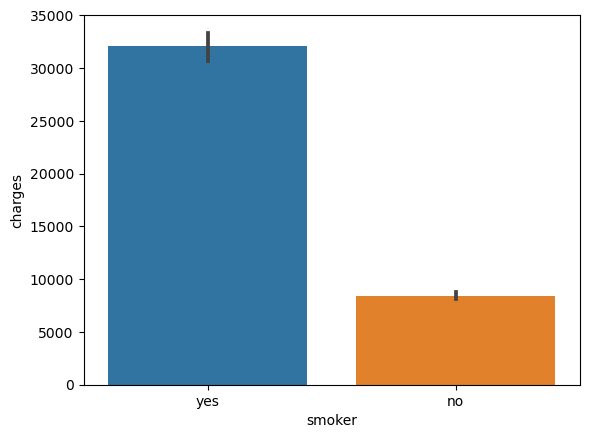

In [23]:
# Visualize what you can see
sns.barplot(data=df, x='smoker', y='charges');

#### The charges for smokers is significantly higher than charges for those who do not smoke.